In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin': # macOS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [3]:
file_path='./data.xlsx'
sheet_name='Sheet0'

try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print("✅ 데이터 로드 성공!")
    
    # 이 셀에서는 df.head()를 넣지 않습니다.
    # 다음 셀에서 확인할 것입니다.
    
except FileNotFoundError:
    print(f"오류: 파일 경로를 찾을 수 없습니다. 파일 이름과 위치({file_path})를 확인하세요.")
except ValueError:
    print(f"오류: 시트 이름을 찾을 수 없습니다. 시트 이름({sheet_name})을 확인하세요.")


# 새로운 셀에 이 코드만 입력하고 실행하세요.
print("--- 데이터프레임 상위 5개 행 ---")
df.head()

✅ 데이터 로드 성공!
--- 데이터프레임 상위 5개 행 ---


/Users/pham/PhamPham2S/Book_Borrowing_Analysis/venv/lib/python3.14/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,번호,도서관,서명,저자,발행자,발행년,ISBN,등록번호,청구기호,대출일,반납일
0,1,화성동탄중앙,매직필 : 기적의 비만 치료제와 살찌지 않는 인간의 탄생,요한 하리 지음 ; 이지연 옮김,어크로스,2025,9791167741905,KTE000143977,513.398-하239ㅁ,2025/11/17,2025/11/30
1,2,봉담,복지의 원리 : 대한민국 복지를 한눈에 꿰뚫는 10가지 이야기,양재진 지음,한겨레,2020,9791160403718,GVE000063054,338.1-양72ㅂ,2025/11/08,2025/11/30
2,3,화성동탄중앙,모든 것이 전쟁이다: 전 세계를 집어삼킨 아마존의 단 하나의 원칙,다나 마티올리 지음 ; 이영래 옮김,21세기북스,2024,9791171179237,KTE000149049,325.1-마839ㅁ,2025/10/27,2025/11/05
3,4,화성동탄중앙,"마음의 여섯 얼굴 : 우울, 불안, 분노, 중독, 광기, 그리고 사랑에 대하여",김건종 지음,에이도스,2019,9791185415338,KTE000113719,181.7-김13ㅁ,2025/10/27,2025/11/05
4,5,병점,기울어진 평등 : 부와 권력은 왜 불평등을 허락하는가,"토마 피케티, 마이클 샌델 [공]지음 ; 장경덕 옮김",와이즈베리,2025,9791173475535,DBE000094796,332.6-피823ㄱ,2025/10/04,2025/10/19


In [4]:
# 중복 확인 기준 컬럼 지정
# 컬럼 '서명'을 기준으로 중복을 확인합니다.
COLUMN_NAME_FOR_DUPLICATE = '서명'

# 제거 전 행의 개수 확인
print(f"제거 전 행의 개수: {len(df)}개")

# 2. 중복 행 제거 (첫 번째 행만 남기고 삭제)
df_cleaned = df.drop_duplicates(subset=[COLUMN_NAME_FOR_DUPLICATE], keep='first')

# 3. 제거 후 행의 개수 확인
print(f"제거 후 행의 개수: {len(df_cleaned)}개")
print(f"제거된 중복 행 개수: {len(df) - len(df_cleaned)}개")

# 4. 데이터프레임 변수를 df_cleaned로 업데이트
df = df_cleaned
df = df.reset_index(drop=True)
print("\n중복 행 제거가 완료되었으며, df 변수에 저장되었습니다.")

# 새로운 셀에 이 코드만 입력하고 실행하세요.
print("--- 중복 제거 후 데이터프레임 상위 5개 행 ---")
df.head()

제거 전 행의 개수: 807개
제거 후 행의 개수: 708개
제거된 중복 행 개수: 99개

중복 행 제거가 완료되었으며, df 변수에 저장되었습니다.
--- 중복 제거 후 데이터프레임 상위 5개 행 ---


,번호,도서관,서명,저자,발행자,발행년,ISBN,등록번호,청구기호,대출일,반납일
0,1,화성동탄중앙,매직필 : 기적의 비만 치료제와 살찌지 않는 인간의 탄생,요한 하리 지음 ; 이지연 옮김,어크로스,2025,9791167741905,KTE000143977,513.398-하239ㅁ,2025/11/17,2025/11/30
1,2,봉담,복지의 원리 : 대한민국 복지를 한눈에 꿰뚫는 10가지 이야기,양재진 지음,한겨레,2020,9791160403718,GVE000063054,338.1-양72ㅂ,2025/11/08,2025/11/30
2,3,화성동탄중앙,모든 것이 전쟁이다: 전 세계를 집어삼킨 아마존의 단 하나의 원칙,다나 마티올리 지음 ; 이영래 옮김,21세기북스,2024,9791171179237,KTE000149049,325.1-마839ㅁ,2025/10/27,2025/11/05
3,4,화성동탄중앙,"마음의 여섯 얼굴 : 우울, 불안, 분노, 중독, 광기, 그리고 사랑에 대하여",김건종 지음,에이도스,2019,9791185415338,KTE000113719,181.7-김13ㅁ,2025/10/27,2025/11/05
4,5,병점,기울어진 평등 : 부와 권력은 왜 불평등을 허락하는가,"토마 피케티, 마이클 샌델 [공]지음 ; 장경덕 옮김",와이즈베리,2025,9791173475535,DBE000094796,332.6-피823ㄱ,2025/10/04,2025/10/19


In [5]:
# 1. 제거할 열(Column)의 이름을 리스트로 정의합니다.
columns_to_drop = ['번호', 'ISBN', '등록번호', '반납일']

# 2. .drop() 메서드를 사용하여 열을 제거하고 df에 바로 적용합니다.
# axis=1: 열(Column) 제거
# inplace=True: 원본 df 수정
df.drop(columns=columns_to_drop, axis=1, inplace=True)

print("✅ 지정된 열(번호, ISBN, 등록번호, 반납일) 제거 완료!")

# 새로운 셀에 다음 코드를 입력하고 실행하세요.

print("--- 열 제거 후 데이터 구조 확인 (df.info()) ---")
df.info()

print("\n--- 열 제거 후 데이터프레임 상위 5개 행 (df.head()) ---")
# df.head()를 셀의 마지막 줄에 단독으로 두어 깔끔한 표로 출력합니다.
df.head()

✅ 지정된 열(번호, ISBN, 등록번호, 반납일) 제거 완료!
--- 열 제거 후 데이터 구조 확인 (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도서관     708 non-null    object
 1   서명      708 non-null    object
 2   저자      708 non-null    object
 3   발행자     708 non-null    object
 4   발행년     708 non-null    object
 5   청구기호    708 non-null    object
 6   대출일     708 non-null    object
dtypes: object(7)
memory usage: 38.8+ KB

--- 열 제거 후 데이터프레임 상위 5개 행 (df.head()) ---


,도서관,서명,저자,발행자,발행년,청구기호,대출일
0,화성동탄중앙,매직필 : 기적의 비만 치료제와 살찌지 않는 인간의 탄생,요한 하리 지음 ; 이지연 옮김,어크로스,2025,513.398-하239ㅁ,2025/11/17
1,봉담,복지의 원리 : 대한민국 복지를 한눈에 꿰뚫는 10가지 이야기,양재진 지음,한겨레,2020,338.1-양72ㅂ,2025/11/08
2,화성동탄중앙,모든 것이 전쟁이다: 전 세계를 집어삼킨 아마존의 단 하나의 원칙,다나 마티올리 지음 ; 이영래 옮김,21세기북스,2024,325.1-마839ㅁ,2025/10/27
3,화성동탄중앙,"마음의 여섯 얼굴 : 우울, 불안, 분노, 중독, 광기, 그리고 사랑에 대하여",김건종 지음,에이도스,2019,181.7-김13ㅁ,2025/10/27
4,병점,기울어진 평등 : 부와 권력은 왜 불평등을 허락하는가,"토마 피케티, 마이클 샌델 [공]지음 ; 장경덕 옮김",와이즈베리,2025,332.6-피823ㄱ,2025/10/04


# "저자" 제외하고 다듬기

### 청구기호 다듬기

In [6]:
# KDC 10대 주류 딕셔너리
kdc_map = {
    0: '000 총류', 1: '100 철학', 2: '200 종교', 3: '300 사회과학', 4: '400 자연과학',
    5: '500 기술과학', 6: '600 예술', 7: '700 언어', 8: '800 문학', 9: '900 역사'
}

# 청구기호에서 문자열 전체에서 가장 처음 나타나는 숫자(0~9)를 추출하여 KDC 주류 명칭을 반환하는 함수
def get_kdc_class_robust(call_number):
    try:
        call_number_str = str(call_number)
        
        # 정규 표현식 r'[0-9]'는 문자열 전체를 스캔하여 가장 먼저 나타나는 숫자 하나를 찾습니다.
        # r'(\d)'와 기능은 같지만, 환경에 따라 r'[0-9]'가 더 명확하게 작동하는 경우가 있습니다.
        match = re.search(r'[0-9]', call_number_str)
        
        if match:
            # 찾은 첫 번째 숫자를 정수로 변환하여 KDC 딕셔너리의 키로 사용
            major_class_num = int(match.group(0))
            
            # 딕셔너리에서 해당하는 분류 명칭을 반환
            return kdc_map.get(major_class_num, '미분류/오류')
        else:
            # 문자열 내부에 숫자가 전혀 없으면 미분류 처리
            return '미분류/오류'
    except Exception as e:
        # 데이터 처리 중 예상치 못한 오류 발생 시 처리 (예: NoneType)
        # print(f"처리 오류 발생: {call_number}, 오류: {e}") 
        return '미분류/오류'

In [7]:
# 1. 수정된 함수(get_kdc_class_robust)를 사용하여 '분류' 열을 업데이트합니다.
# 기존 '청구기호' 열은 그대로 유지됩니다.
df['분류'] = df['청구기호'].apply(get_kdc_class_robust)

# 2. 결과 확인
print("✅ '분류' 열 재업데이트 완료 (문자 무시, 첫 번째 숫자 추출)")
print("\n--- '청구기호'와 '분류' 열이 포함된 데이터프레임 확인 (상위 5개) ---")

df[['청구기호', '분류']].head()

✅ '분류' 열 재업데이트 완료 (문자 무시, 첫 번째 숫자 추출)

--- '청구기호'와 '분류' 열이 포함된 데이터프레임 확인 (상위 5개) ---


,청구기호,분류
0,513.398-하239ㅁ,500 기술과학
1,338.1-양72ㅂ,300 사회과학
2,325.1-마839ㅁ,300 사회과학
3,181.7-김13ㅁ,100 철학
4,332.6-피823ㄱ,300 사회과학


In [8]:
# '분류' 열의 값이 '미분류/오류'인 모든 행을 필터링합니다.
error_rows_final = df[df['분류'] == '미분류/오류']

print("\n🚨 최종 수정 후 '미분류/오류' 항목 확인 🚨")
print(f"총 {len(error_rows_final)}개의 행에서 미분류/오류가 발생했습니다.")

# 필터링된 모든 행을 출력합니다.
error_rows_final


🚨 최종 수정 후 '미분류/오류' 항목 확인 🚨
총 0개의 행에서 미분류/오류가 발생했습니다.


,도서관,서명,저자,발행자,발행년,청구기호,대출일,분류


### 대출일 다듬기

In [9]:
df['대출년도'] = df['대출일'].astype(str).str.split('/').str[0]

# 결과 확인: '대출일'과 새로 생성된 '대출년도' 열을 함께 출력하여 확인
print("✅ '대출년도' 열 추가 완료")
print("\n--- '대출일'과 '대출년도' 열이 포함된 데이터프레임 확인 (상위 5개) ---")

df[['대출일', '대출년도']].head()

✅ '대출년도' 열 추가 완료

--- '대출일'과 '대출년도' 열이 포함된 데이터프레임 확인 (상위 5개) ---


,대출일,대출년도
0,2025/11/17,2025
1,2025/11/08,2025
2,2025/10/27,2025
3,2025/10/27,2025
4,2025/10/04,2025


### 기타 다듬기

In [10]:
# 1. 숫자만 남기는 함수 정의
def clean_year(year):
    # NaN이나 None 값은 문자열로 변환하여 처리합니다.
    year_str = str(year)
    
    # 숫자(0-9)가 아닌 모든 문자(r'\D')를 빈 문자열('')로 대체하여 제거합니다.
    cleaned_year = re.sub(r'\D', '', year_str)
    
    # 2. 네 자리 숫자인지 확인
    if len(cleaned_year) == 4 and cleaned_year.isdigit():
        return cleaned_year
    else:
        # 네 자리가 아니거나 숫자로만 이루어지지 않았다면 '모름'으로 처리합니다.
        return '모름'

# 3. '발행년' 열에 함수 적용 및 업데이트
df['발행년'] = df['발행년'].apply(clean_year)

print("✅ '발행년' 열 클리닝 완료! (숫자만 남기고, 4자리 아니면 '모름' 처리)")

# 4. 결과 확인: '발행년' 열의 클리닝 전후 분포를 확인하기 위해 다시 빈도 분석
print("\n--- 클리닝 후 '발행년'별 대출 건수 (상위 10개) ---")

# '모름' 처리된 항목을 포함한 빈도 분석
cleaned_year_counts = df['발행년'].value_counts()
cleaned_year_df = cleaned_year_counts.reset_index()
cleaned_year_df.columns = ['발행년', '건수']

# 상위 10개 항목과 '모름' 항목을 함께 확인
print(cleaned_year_df.head(10))

✅ '발행년' 열 클리닝 완료! (숫자만 남기고, 4자리 아니면 '모름' 처리)

--- 클리닝 후 '발행년'별 대출 건수 (상위 10개) ---
    발행년  건수
0  2004  81
1  2002  77
2  2003  59
3  2005  41
4  2020  39
5  2021  36
6  2013  30
7  2015  28
8  2018  25
9  2024  25


In [11]:
# ----------------- 0 값 포함된 연도별 카운트 다시 계산 -----------------

def fill_year_gaps_fixed(series, col_name):
    # '모름' 항목과 NaN은 제외하고 숫자 연도만 사용
    valid_data = series[series.index.str.isdigit()].index.astype(int)

    if valid_data.empty: 
        print(f"⚠️ {col_name}에 유효한 연도가 없어 0 채우기를 건너뜁니다.")
        return pd.Series([], dtype=float)

    # 1. 최소/최대 연도 설정
    min_data_year = valid_data.min()
    max_data_year = valid_data.max()
    
    # 2. 합리적인 시작 연도 설정 (데이터 최소 연도가 1900년보다 작으면 1900년으로 시작)
    # 이는 '1년', '2년' 같은 오류 값을 제거하기 위한 안전 장치입니다.
    start_year = max(1900, min_data_year) 
    
    # 3. 전체 연도 범위 생성 (start_year ~ max_data_year)
    all_years_range = pd.Series(range(start_year, max_data_year + 1)).astype(str)
    
    # 현재 카운트
    current_counts = series
    
    # 4. 전체 연도 범위에 데이터를 다시 인덱싱하고 0으로 채움
    filled_counts = current_counts.reindex(all_years_range, fill_value=0)
    
    return filled_counts

# 0 포함된 발행년/대출년도 Series 재계산
# (이전 단계에서 df['발행년'] 클리닝이 완료되었다고 가정합니다.)
issue_year_counts = df['발행년'].value_counts()
loan_year_counts = df['대출년도'].value_counts() # 이 열은 이미 4자리 숫자라고 가정

issue_year_counts_filled = fill_year_gaps_fixed(issue_year_counts, '발행년')
loan_year_counts_filled = fill_year_gaps_fixed(loan_year_counts, '대출년도')

print("✅ '발행년' 및 '대출년도' 0인 값 채우기 (유효 범위 내) 재완료.")


# ----------------- 결과 확인 -----------------

print("\n--- 발행년별 건수 (0 포함, 수정된 범위) ---")
# 새로 생성된 Series의 처음과 끝 5개 항목을 출력하여 범위를 확인합니다.
print(issue_year_counts_filled.head()) 
print('...')
print(issue_year_counts_filled.tail())

print("\n--- 대출년도별 건수 (0 포함, 수정된 범위) ---")
print(loan_year_counts_filled.head())
print('...')
print(loan_year_counts_filled.tail())

✅ '발행년' 및 '대출년도' 0인 값 채우기 (유효 범위 내) 재완료.

--- 발행년별 건수 (0 포함, 수정된 범위) ---
1990    1
1991    0
1992    0
1993    1
1994    0
Name: count, dtype: int64
...
2021    36
2022    22
2023    17
2024    25
2025     4
Name: count, dtype: int64

--- 대출년도별 건수 (0 포함, 수정된 범위) ---
2004    98
2005    94
2006    91
2007     0
2008     0
Name: count, dtype: int64
...
2021     65
2022    127
2023     32
2024     86
2025     30
Name: count, dtype: int64



--- 5개 항목에 대한 막대 그래프를 생성하고 바로 출력합니다 (0값 포함, 상위 20개) ---
✅ 도서관 그래프 저장 완료: chart_도서관.png


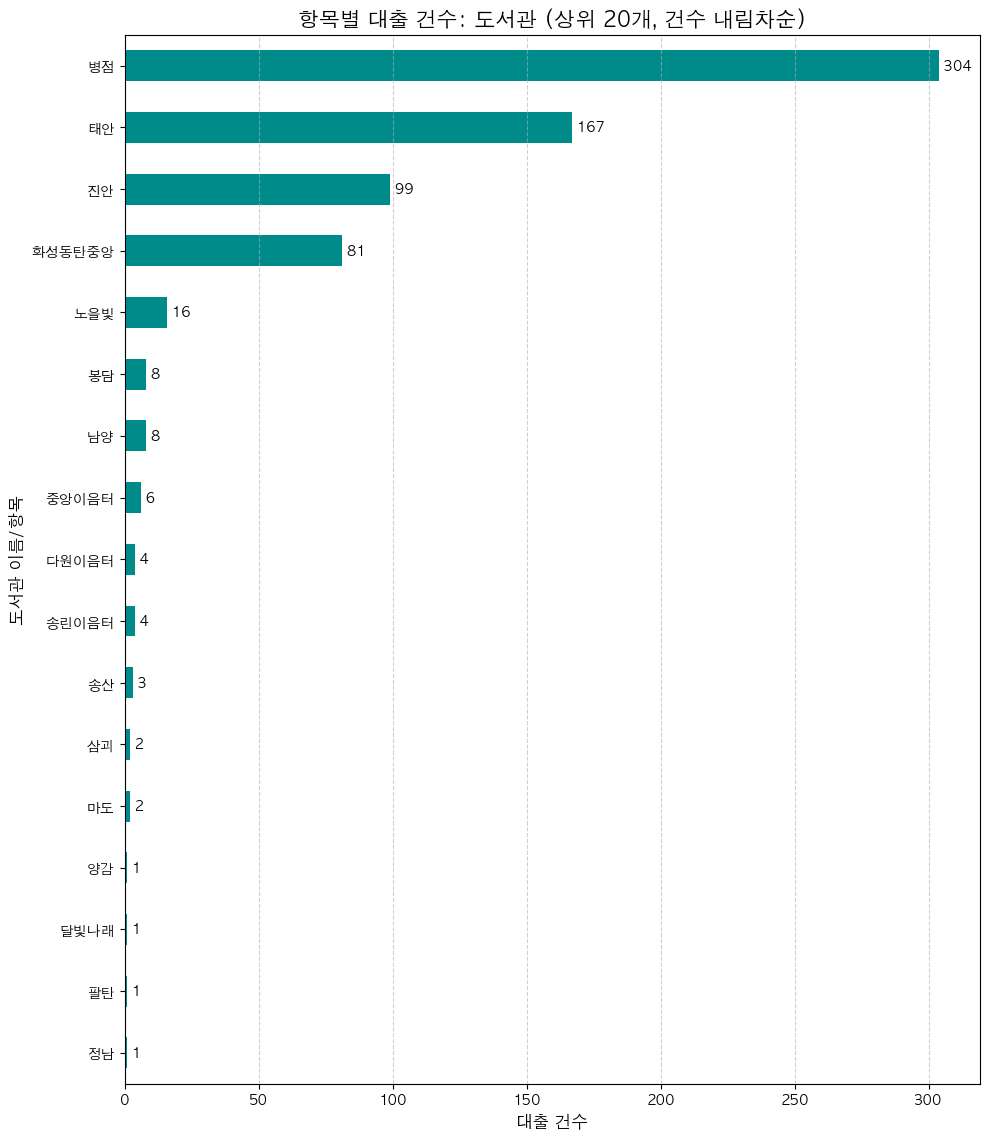

✅ 발행자 그래프 저장 완료: chart_발행자.png


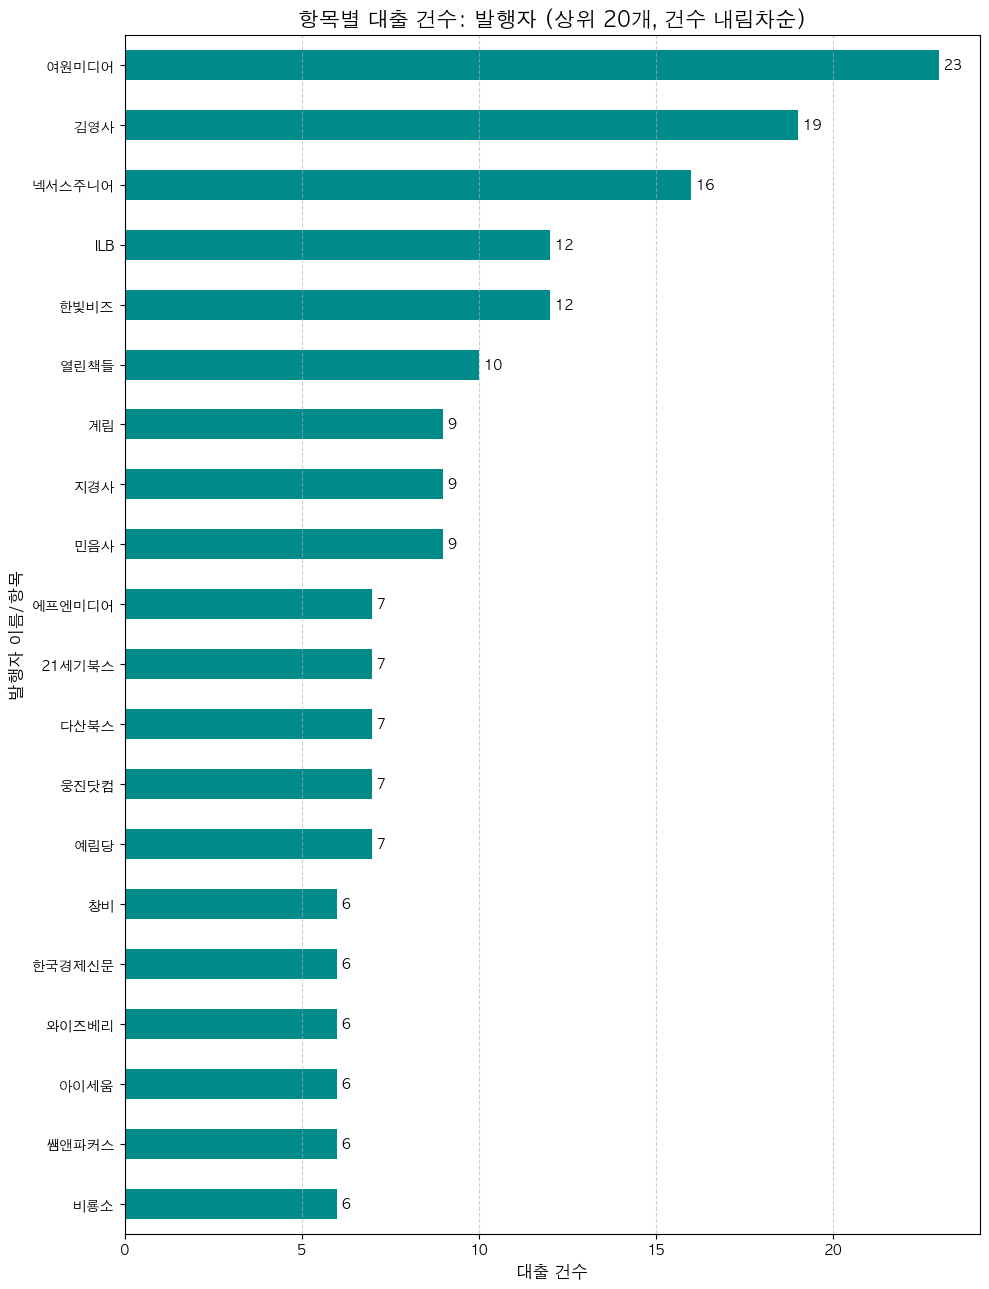

✅ 발행년 그래프 저장 완료: chart_발행년.png


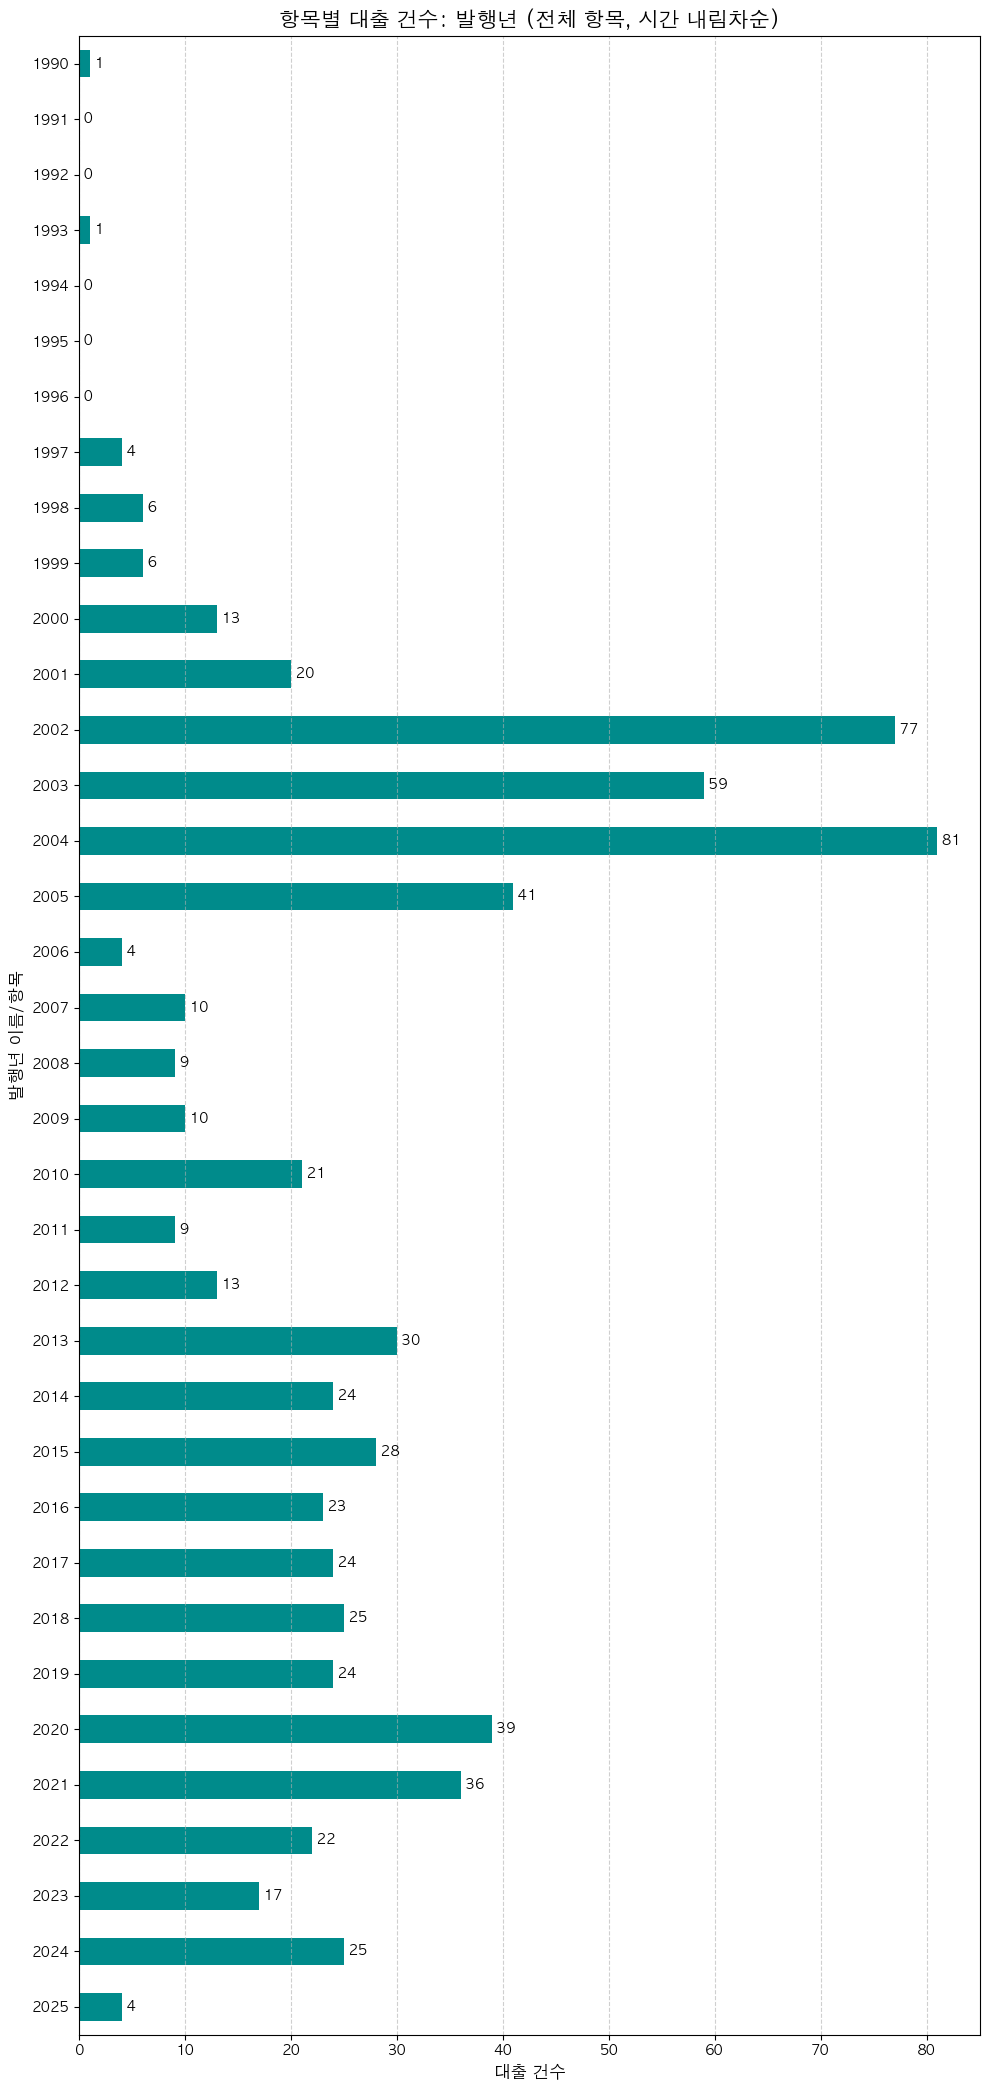

✅ 분류 그래프 저장 완료: chart_분류.png


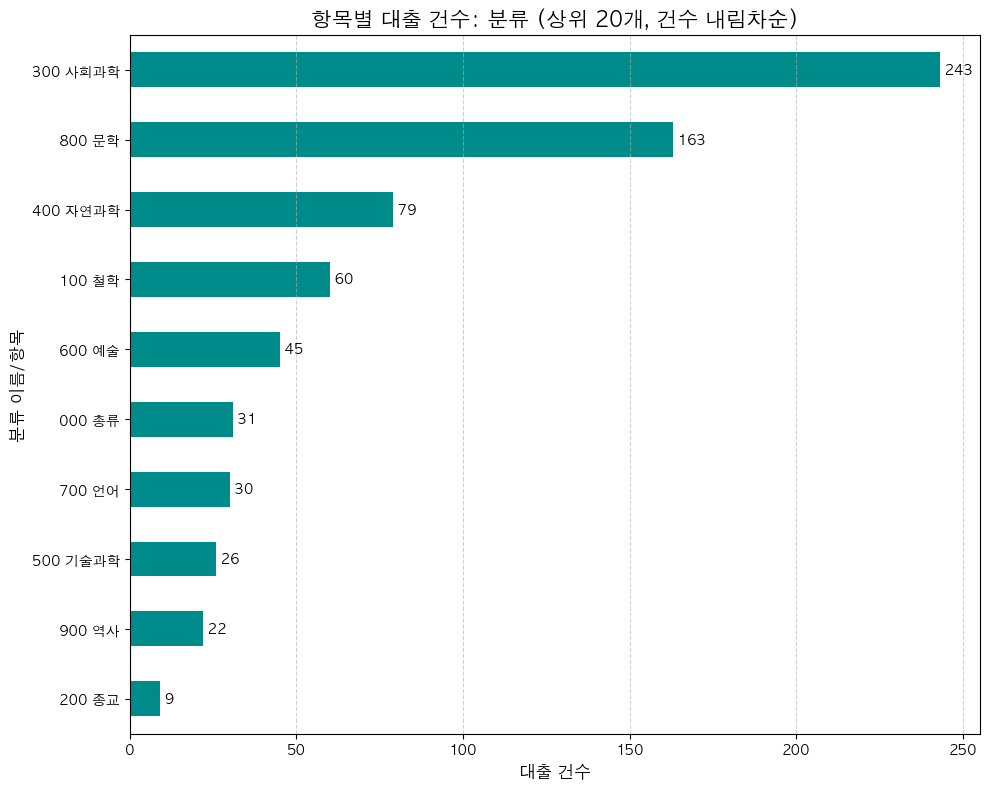

✅ 대출년도 그래프 저장 완료: chart_대출년도.png


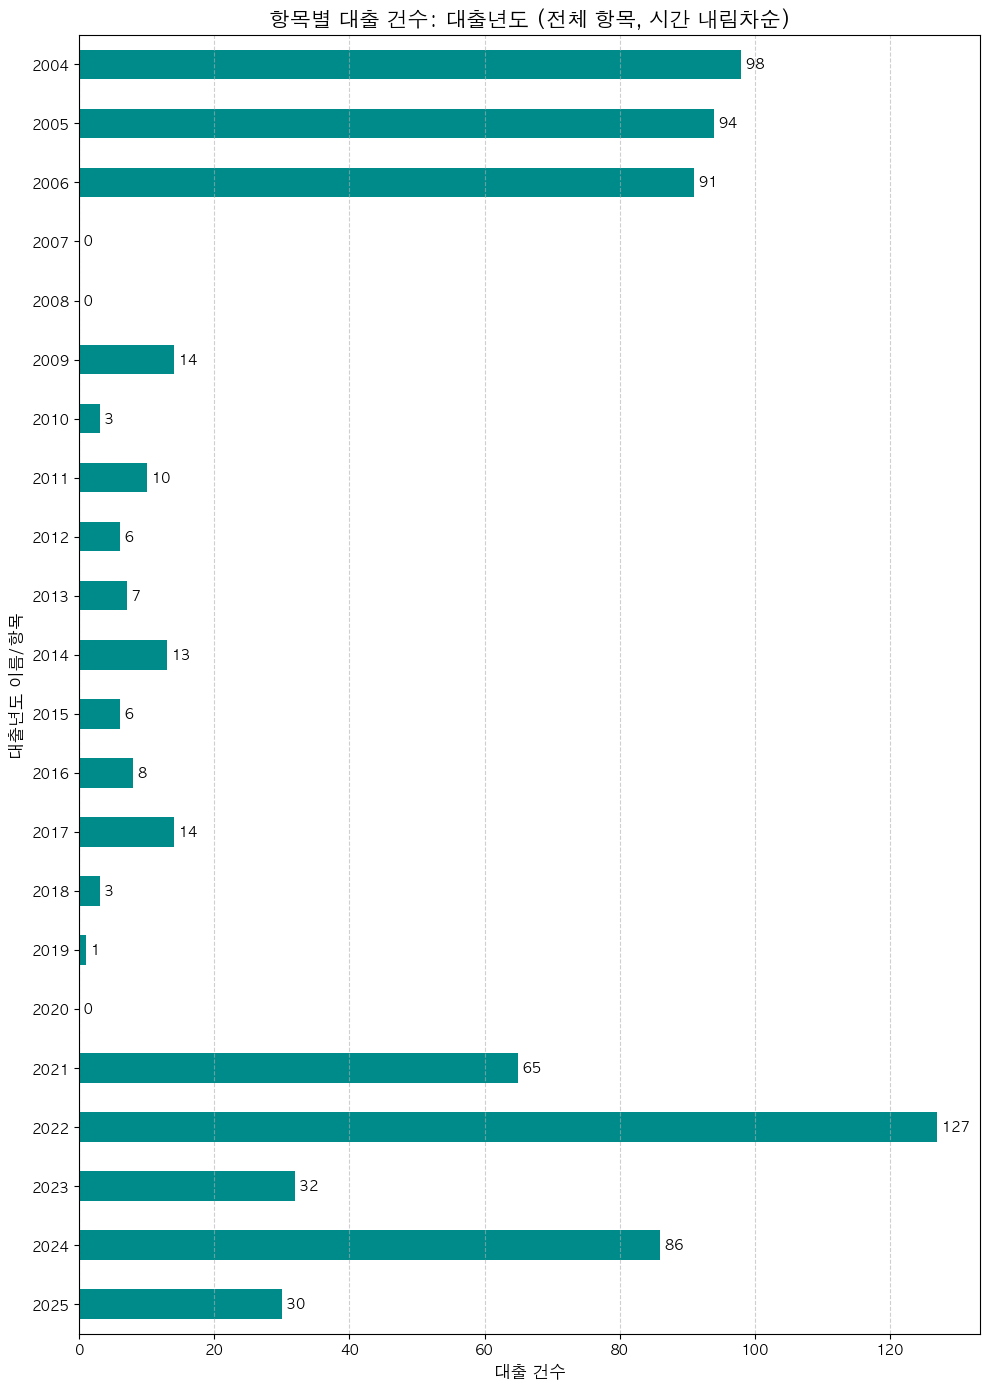


--- 모든 그래프 출력이 완료되었습니다. ---


In [12]:
# ----------------- 3. 5개 항목 그래프 생성 (바로 출력) -----------------
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False 

columns_to_plot = ['도서관', '발행자', '발행년', '분류', '대출년도']
top_n = 20 # 상위 20개로 설정

print("\n--- 5개 항목에 대한 막대 그래프를 생성하고 바로 출력합니다 (0값 포함, 상위 20개) ---")

for col in columns_to_plot:
    
    # 📌 발행년과 대출년도는 0이 채워진 Series를 사용합니다.
    if col == '발행년':
        counts = issue_year_counts_filled
    elif col == '대출년도':
        counts = loan_year_counts_filled
    else:
        # 나머지 항목은 원본 value_counts를 사용합니다.
        counts = df[col].value_counts() 
        
    
    if col in ['발행년', '대출년도']:
        # 시간별(Index) 내림차순 정렬 (최신년도부터)
        plot_data = counts
        title_suffix = f' (전체 항목, 시간 내림차순)'
        try:
            # Index(년도)를 정수로 변환 후 내림차순 정렬 (ascending=False)
            plot_data = plot_data.sort_index(key=lambda x: x.astype(int), ascending=False)
        except Exception:
            plot_data = plot_data.sort_index(ascending=False)
            
    else:
        # 건수(Value) 기준 내림차순으로 상위 20개 추출
        plot_data = counts.head(top_n)
        # 이미 value_counts()가 내림차순이므로 별도 정렬은 필요 없으며, head(20)이 적용됩니다.
        title_suffix = f' (상위 {top_n}개, 건수 내림차순)'

    
    # --- 그래프 생성 및 출력 ---
    plt.figure(figsize=(10, len(plot_data) * 0.5 + 3)) 
    
    plot_data.plot(kind='barh', color='darkcyan') 
    
    plt.title(f'항목별 대출 건수: {col}{title_suffix}', fontsize=15) 
    plt.xlabel('대출 건수', fontsize=12)
    plt.ylabel(f'{col} 이름/항목', fontsize=12)
    
    # 년도 데이터는 반전하지 않음 (최신년도가 위에 표시됨)
    if col not in ['발행년', '대출년도']:
        plt.gca().invert_yaxis() 
    
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # 막대 끝에 건수(값) 표시
    for index, value in enumerate(plot_data.values):
        plt.text(value, index, f' {value}', va='center')

    plt.tight_layout()

    # --- PNG 파일 저장 함수 ---
    file_name = f'chart_{col}.png'.replace(' ', '_')
    plt.savefig(file_name) # PNG 파일로 저장
    print(f"✅ {col} 그래프 저장 완료: {file_name}")

    # 그래프 출력
    plt.show() 
    plt.close()

print("\n--- 모든 그래프 출력이 완료되었습니다. ---")

# "저자" 다듬기

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도서관     708 non-null    object
 1   서명      708 non-null    object
 2   저자      708 non-null    object
 3   발행자     708 non-null    object
 4   발행년     708 non-null    object
 5   청구기호    708 non-null    object
 6   대출일     708 non-null    object
 7   분류      708 non-null    object
 8   대출년도    708 non-null    object
dtypes: object(9)
memory usage: 49.9+ KB


,도서관,서명,저자,발행자,발행년,청구기호,대출일,분류,대출년도
0,화성동탄중앙,매직필 : 기적의 비만 치료제와 살찌지 않는 인간의 탄생,요한 하리 지음 ; 이지연 옮김,어크로스,2025,513.398-하239ㅁ,2025/11/17,500 기술과학,2025
1,봉담,복지의 원리 : 대한민국 복지를 한눈에 꿰뚫는 10가지 이야기,양재진 지음,한겨레,2020,338.1-양72ㅂ,2025/11/08,300 사회과학,2025
2,화성동탄중앙,모든 것이 전쟁이다: 전 세계를 집어삼킨 아마존의 단 하나의 원칙,다나 마티올리 지음 ; 이영래 옮김,21세기북스,2024,325.1-마839ㅁ,2025/10/27,300 사회과학,2025
3,화성동탄중앙,"마음의 여섯 얼굴 : 우울, 불안, 분노, 중독, 광기, 그리고 사랑에 대하여",김건종 지음,에이도스,2019,181.7-김13ㅁ,2025/10/27,100 철학,2025
4,병점,기울어진 평등 : 부와 권력은 왜 불평등을 허락하는가,"토마 피케티, 마이클 샌델 [공]지음 ; 장경덕 옮김",와이즈베리,2025,332.6-피823ㄱ,2025/10/04,300 사회과학,2025


In [18]:
# '저자' 열만 포함하는 새로운 DataFrame을 만듭니다.
# '저자' 열의 이름이 '저자'라고 가정하고 진행합니다.
df_author = df[['저자']].copy()

print("✅ '저자' 열만 분리한 새로운 DataFrame 'df_author' 생성 완료!")
df_author.head(20)

✅ '저자' 열만 분리한 새로운 DataFrame 'df_author' 생성 완료!


,저자
0,요한 하리 지음 ; 이지연 옮김
1,양재진 지음
2,다나 마티올리 지음 ; 이영래 옮김
3,김건종 지음
4,"토마 피케티, 마이클 샌델 [공]지음 ; 장경덕 옮김"
5,서암 스님 지음
6,서암 스님 지음
7,법정 지음
8,"전홍재, 최성훈, 권창일 [공]지음"
9,"김용태, 류지곤, 이상협 [공]저"


In [20]:
# '지음'이 포함되지 않은 행만 필터링합니다.
# ~df_author['저자'].str.contains('지음')는 '지음'을 포함하는 행에 False를 반환합니다.
no_jieum_rows = df_author[~df_author['저자'].astype(str).str.contains('지음')]

print("✅ '저자' 열에 '지음'이 포함되지 않은 행들")
print(f"총 {len(no_jieum_rows)}개의 행이 필터링되었습니다.")

# 필터링된 결과의 상위 20개 행을 출력합니다.
no_jieum_rows.head(20)

✅ '저자' 열에 '지음'이 포함되지 않은 행들
총 264개의 행이 필터링되었습니다.


,저자
9,"김용태, 류지곤, 이상협 [공]저"
30,토스 엮음
34,서장원 글 ; 마라 세리 그림
36,장프랑수아 마르미옹 엮음 ; 박효은 옮김
57,"트래비스 로더밀크, 제시카 리치 공저 ; 안지희 옮김"
64,헨리 조지 원저 ; 김윤상 옮김
91,"이치우, 이한나 [공] 저"
150,"에드 캣멀, 에이미 월러스 [공저], 윤태경 옮김"
171,"조지 애커로프, 로버트 쉴러 공저 ; 김태훈 옮김"
175,"프리드리히 니체, 시라토리하루히코 엮음 ; 박재현 옮김"
